[*********************100%%**********************]  1 of 1 completed

SMA Strategy: CAGR=3.34%, Sharpe=0.19, Max Drawdown=-45.88%, Win Rate=50.02%
Big Moves Monday Strategy: CAGR=-2.39%, Sharpe=-0.44, Max Drawdown=-31.28%, Win Rate=4.85%
MACrossover Strategy: CAGR=8.79%, Sharpe=0.37, Max Drawdown=-57.08%, Win Rate=50.50%
SMA Strategy: CAGR=3.34%, Sharpe=0.19, Max Drawdown=-45.88%, Win Rate=50.02%
Big Moves Monday Strategy: CAGR=-2.39%, Sharpe=-0.44, Max Drawdown=-31.28%, Win Rate=4.85%
MACrossover Strategy: CAGR=8.79%, Sharpe=0.37, Max Drawdown=-57.08%, Win Rate=50.50%


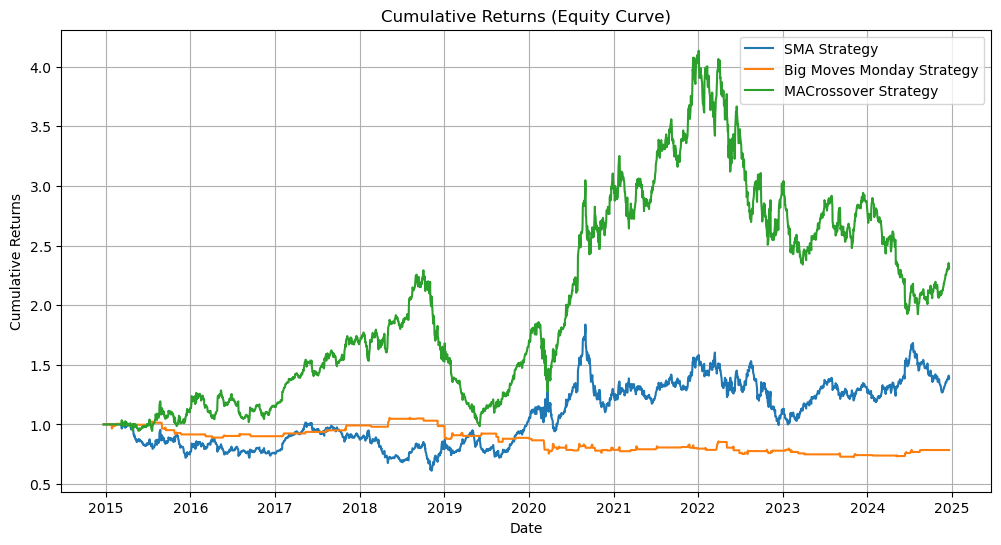

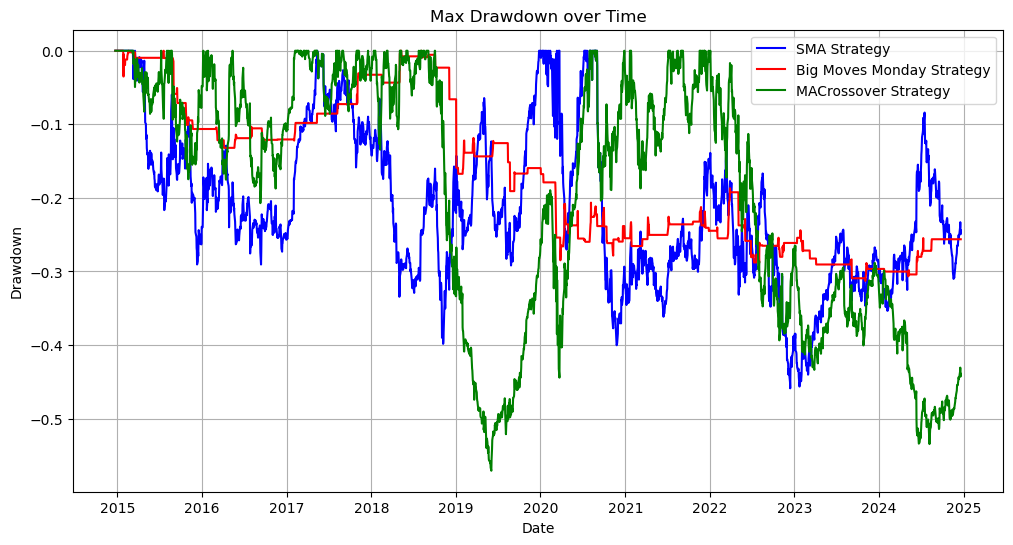

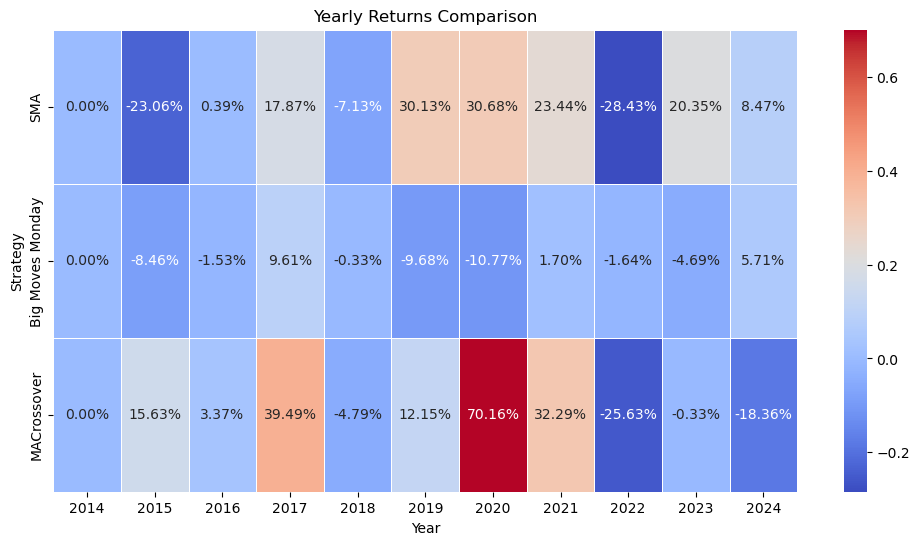

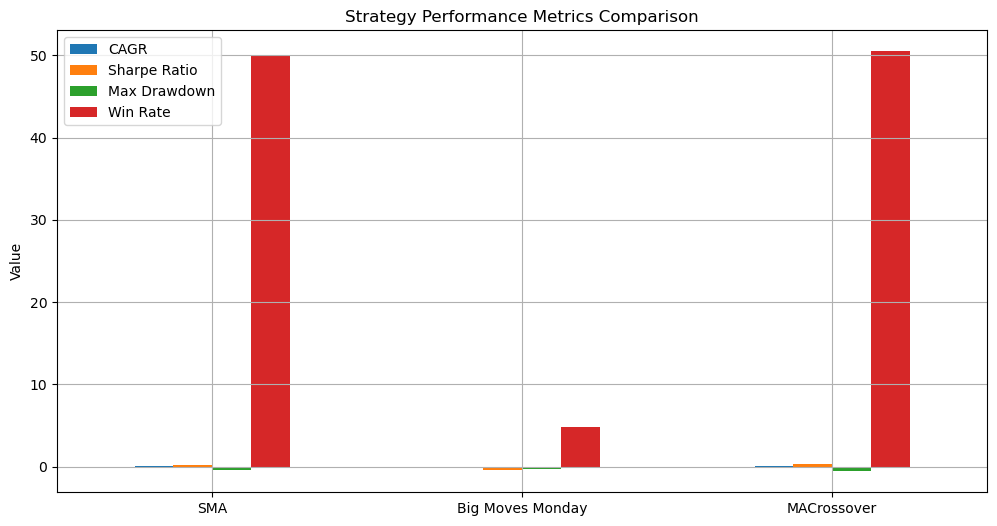

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch Data (Last 10 years)
stock_symbol = "AAPL"
start_date = "2014-12-20"
end_date = "2024-12-20"

# Fetch daily stock data
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Simple Moving Average (SMA) Strategy
def sma_strategy(data, sma_window=50):
    data['SMA'] = data['Close'].rolling(window=sma_window).mean()
    data['Signal'] = 0
    # Use .iloc to slice the DataFrame by position
    data.iloc[sma_window:, data.columns.get_loc('Signal')] = np.where(
        data['Close'].iloc[sma_window:].values > data['SMA'].iloc[sma_window:].values, 1, -1
    )
    data['Returns'] = data['Close'].pct_change() * data['Signal'].shift(1)
    return data

# Big Moves on Mondays Strategy
def big_moves_monday_strategy(data, threshold=0.05):
    data['Week_Return'] = data['Close'].pct_change(periods=5)  # Weekly return (5 trading days)
    data['Signal'] = 0
    # Use .iloc to avoid SettingWithCopyWarning
    data.iloc[data['Week_Return'] > threshold, data.columns.get_loc('Signal')] = 1  # Buy if weekly return exceeds threshold
    data['Returns'] = data['Close'].pct_change() * data['Signal'].shift(1)
    return data

# Moving Average Crossover Strategy
def macrossover_strategy(data, short_window=50, long_window=200):
    data['SMA50'] = data['Close'].rolling(window=short_window).mean()
    data['SMA200'] = data['Close'].rolling(window=long_window).mean()
    data['Signal'] = 0
    # Use .iloc to avoid SettingWithCopyWarning
    data.iloc[short_window:, data.columns.get_loc('Signal')] = np.where(
        data['SMA50'].iloc[short_window:].values > data['SMA200'].iloc[short_window:].values, 1, -1
    )
    data['Returns'] = data['Close'].pct_change() * data['Signal'].shift(1)
    return data

# Backtest function to calculate key performance metrics
def backtest(data):
    # Drop any rows with NaN values in the Returns column for accurate calculations
    data.dropna(subset=['Returns'], inplace=True)

    # Calculate cumulative returns
    data['Cumulative_Returns'] = (1 + data['Returns']).cumprod()

    # Ensure no NaN values in Cumulative_Returns before calculating CAGR
    data.dropna(subset=['Cumulative_Returns'], inplace=True)

    # CAGR (Compound Annual Growth Rate)
    years = (data.index[-1] - data.index[0]).days / 365.25
    cagr = (data['Cumulative_Returns'].iloc[-1] / data['Cumulative_Returns'].iloc[0]) ** (1 / years) - 1

    # Sharpe Ratio
    risk_free_rate = 0.02  # Risk-free rate (adjustable)
    excess_returns = data['Returns'] - risk_free_rate / 252  # Adjusted for daily returns
    sharpe_ratio = excess_returns.mean() / excess_returns.std() * np.sqrt(252)

    # Max Drawdown
    data['Roll_Max'] = data['Cumulative_Returns'].cummax()
    data['Drawdown'] = data['Cumulative_Returns'] / data['Roll_Max'] - 1
    max_drawdown = data['Drawdown'].min()

    # Win Rate
    wins = len(data[data['Returns'] > 0])
    total_trades = len(data[~data['Returns'].isna()])
    win_rate = (wins / total_trades) * 100

    return cagr, sharpe_ratio, max_drawdown, win_rate

# Apply each strategy and calculate backtest results
data_sma = sma_strategy(data.copy(), sma_window=50)
data_big_moves = big_moves_monday_strategy(data.copy(), threshold=0.05)
data_macrossover = macrossover_strategy(data.copy(), short_window=50, long_window=200)

# Backtest the strategies
cagr_sma, sharpe_sma, max_dd_sma, win_rate_sma = backtest(data_sma)
cagr_big_moves, sharpe_big_moves, max_dd_big_moves, win_rate_big_moves = backtest(data_big_moves)
cagr_macrossover, sharpe_macrossover, max_dd_macrossover, win_rate_macrossover = backtest(data_macrossover)

# Print Performance Metrics for each strategy
print(f"SMA Strategy: CAGR={cagr_sma:.2%}, Sharpe={sharpe_sma:.2f}, Max Drawdown={max_dd_sma:.2%}, Win Rate={win_rate_sma:.2f}%")
print(f"Big Moves Monday Strategy: CAGR={cagr_big_moves:.2%}, Sharpe={sharpe_big_moves:.2f}, Max Drawdown={max_dd_big_moves:.2%}, Win Rate={win_rate_big_moves:.2f}%")
print(f"MACrossover Strategy: CAGR={cagr_macrossover:.2%}, Sharpe={sharpe_macrossover:.2f}, Max Drawdown={max_dd_macrossover:.2%}, Win Rate={win_rate_macrossover:.2f}%")


# Apply each strategy
data_sma = sma_strategy(data.copy(), sma_window=50)
data_big_moves = big_moves_monday_strategy(data.copy(), threshold=0.05)
data_macrossover = macrossover_strategy(data.copy(), short_window=50, long_window=200)

# Backtest the strategies
cagr_sma, sharpe_sma, max_dd_sma, win_rate_sma = backtest(data_sma)
cagr_big_moves, sharpe_big_moves, max_dd_big_moves, win_rate_big_moves = backtest(data_big_moves)
cagr_macrossover, sharpe_macrossover, max_dd_macrossover, win_rate_macrossover = backtest(data_macrossover)

# Print Performance Metrics for each strategy
print(f"SMA Strategy: CAGR={cagr_sma:.2%}, Sharpe={sharpe_sma:.2f}, Max Drawdown={max_dd_sma:.2%}, Win Rate={win_rate_sma:.2f}%")
print(f"Big Moves Monday Strategy: CAGR={cagr_big_moves:.2%}, Sharpe={sharpe_big_moves:.2f}, Max Drawdown={max_dd_big_moves:.2%}, Win Rate={win_rate_big_moves:.2f}%")
print(f"MACrossover Strategy: CAGR={cagr_macrossover:.2%}, Sharpe={sharpe_macrossover:.2f}, Max Drawdown={max_dd_macrossover:.2%}, Win Rate={win_rate_macrossover:.2f}%")

# Visualize the Strategies
def visualize_performance(data_sma, data_big_moves, data_macrossover):
    # Cumulative Returns (Equity Curve)
    plt.figure(figsize=(12, 6))
    plt.plot(data_sma['Cumulative_Returns'], label="SMA Strategy")
    plt.plot(data_big_moves['Cumulative_Returns'], label="Big Moves Monday Strategy")
    plt.plot(data_macrossover['Cumulative_Returns'], label="MACrossover Strategy")
    plt.title('Cumulative Returns (Equity Curve)')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Drawdown Plot
    plt.figure(figsize=(12, 6))
    plt.plot(data_sma['Drawdown'], label="SMA Strategy", color='blue')
    plt.plot(data_big_moves['Drawdown'], label="Big Moves Monday Strategy", color='red')
    plt.plot(data_macrossover['Drawdown'], label="MACrossover Strategy", color='green')
    plt.title('Max Drawdown over Time')
    plt.xlabel('Date')
    plt.ylabel('Drawdown')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Yearly Returns Heatmap
    yearly_returns_sma = data_sma['Returns'].resample('Y').sum()
    yearly_returns_big_moves = data_big_moves['Returns'].resample('Y').sum()
    yearly_returns_macrossover = data_macrossover['Returns'].resample('Y').sum()

    # Creating a DataFrame and ensuring only the year is used as the index
    yearly_returns = pd.DataFrame({
        'SMA': yearly_returns_sma,
        'Big Moves Monday': yearly_returns_big_moves,
        'MACrossover': yearly_returns_macrossover
    })

    # Extract the year from the index for displaying purposes
    yearly_returns.index = yearly_returns.index.year

    plt.figure(figsize=(12, 6))
    sns.heatmap(yearly_returns.T, annot=True, cmap='coolwarm', fmt='.2%', linewidths=0.5)
    plt.title('Yearly Returns Comparison')
    plt.ylabel('Strategy')
    plt.xlabel('Year')
    plt.show()

    # Performance Metrics Comparison
    metrics = {
        'CAGR': [cagr_sma, cagr_big_moves, cagr_macrossover],
        'Sharpe Ratio': [sharpe_sma, sharpe_big_moves, sharpe_macrossover],
        'Max Drawdown': [max_dd_sma, max_dd_big_moves, max_dd_macrossover],
        'Win Rate': [win_rate_sma, win_rate_big_moves, win_rate_macrossover]
    }

    metrics_df = pd.DataFrame(metrics, index=["SMA", "Big Moves Monday", "MACrossover"])

    # Bar Plot for Performance Metrics
    metrics_df.plot(kind='bar', figsize=(12, 6))
    plt.title('Strategy Performance Metrics Comparison')
    plt.ylabel('Value')
    plt.xticks(rotation=0)
    plt.grid(True)
    plt.show()

# Visualizing the performance of the strategies
visualize_performance(data_sma, data_big_moves, data_macrossover)
